# ワクチンのefficacyのClopper-Pearsonの信頼区間

* 黒木玄
* 2022-10-14～2022-10-15
$
\newcommand\op{\operatorname}
\newcommand\IRR{\op{IRR}}
\newcommand\IRRhat{\widehat{\IRR}}
\newcommand\VE{\op{VE}}
\newcommand\VEhat{\widehat{\VE}}
\newcommand\quantile{\op{quantile}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{confint}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データと統計モデルの記述" data-toc-modified-id="データと統計モデルの記述-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データと統計モデルの記述</a></span><ul class="toc-item"><li><span><a href="#データ-の記述" data-toc-modified-id="データ-の記述-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>データ の記述</a></span><ul class="toc-item"><li><span><a href="#データの数値" data-toc-modified-id="データの数値-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>データの数値</a></span></li><li><span><a href="#IRRの点推定値の定義" data-toc-modified-id="IRRの点推定値の定義-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>IRRの点推定値の定義</a></span></li><li><span><a href="#VEの点推定値の定義" data-toc-modified-id="VEの点推定値の定義-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>VEの点推定値の定義</a></span></li></ul></li><li><span><a href="#統計モデルの記述" data-toc-modified-id="統計モデルの記述-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>統計モデルの記述</a></span><ul class="toc-item"><li><span><a href="#Poisson分布モデル" data-toc-modified-id="Poisson分布モデル-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Poisson分布モデル</a></span></li><li><span><a href="#モデルのパラメータとしてのIRRとVEの定義" data-toc-modified-id="モデルのパラメータとしてのIRRとVEの定義-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>モデルのパラメータとしてのIRRとVEの定義</a></span></li></ul></li><li><span><a href="#統計モデルの条件付き確率分布としての二項分布モデル" data-toc-modified-id="統計モデルの条件付き確率分布としての二項分布モデル-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>統計モデルの条件付き確率分布としての二項分布モデル</a></span><ul class="toc-item"><li><span><a href="#nuisanceパラメータ" data-toc-modified-id="nuisanceパラメータ-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>nuisanceパラメータ</a></span></li><li><span><a href="#総人年の比" data-toc-modified-id="総人年の比-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>総人年の比</a></span></li><li><span><a href="#条件付き確率分布としての二項分布モデル" data-toc-modified-id="条件付き確率分布としての二項分布モデル-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>条件付き確率分布としての二項分布モデル</a></span></li></ul></li></ul></li><li><span><a href="#P値函数と信頼区間" data-toc-modified-id="P値函数と信頼区間-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>P値函数と信頼区間</a></span><ul class="toc-item"><li><span><a href="#有意水準と信頼度" data-toc-modified-id="有意水準と信頼度-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>有意水準と信頼度</a></span></li><li><span><a href="#Clopper-PearsonのP値函数" data-toc-modified-id="Clopper-PearsonのP値函数-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clopper-PearsonのP値函数</a></span></li><li><span><a href="#Clopper-PearsonのP値函数の利点と欠点" data-toc-modified-id="Clopper-PearsonのP値函数の利点と欠点-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Clopper-PearsonのP値函数の利点と欠点</a></span></li><li><span><a href="#Clopper-Pearsonの信頼区間の定義" data-toc-modified-id="Clopper-Pearsonの信頼区間の定義-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間の定義</a></span></li><li><span><a href="#信頼区間の解釈の仕方" data-toc-modified-id="信頼区間の解釈の仕方-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>信頼区間の解釈の仕方</a></span></li><li><span><a href="#Clopper-Pearsonの信頼区間のベータ分布表示" data-toc-modified-id="Clopper-Pearsonの信頼区間のベータ分布表示-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間のベータ分布表示</a></span></li><li><span><a href="#IRRとVEに関するClopper-Pearsonの信頼区間" data-toc-modified-id="IRRとVEに関するClopper-Pearsonの信頼区間-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>IRRとVEに関するClopper-Pearsonの信頼区間</a></span></li><li><span><a href="#Bayes的な方法との比較" data-toc-modified-id="Bayes的な方法との比較-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Bayes的な方法との比較</a></span></li><li><span><a href="#Bayes的な点推定値" data-toc-modified-id="Bayes的な点推定値-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Bayes的な点推定値</a></span></li><li><span><a href="#Pfizer社のプロトコルで採用されている事前分布" data-toc-modified-id="Pfizer社のプロトコルで採用されている事前分布-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Pfizer社のプロトコルで採用されている事前分布</a></span></li></ul></li><li><span><a href="#参照文献と参考動画" data-toc-modified-id="参照文献と参考動画-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>参照文献と参考動画</a></span><ul class="toc-item"><li><span><a href="#参照文献" data-toc-modified-id="参照文献-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>参照文献</a></span></li><li><span><a href="#参考動画" data-toc-modified-id="参考動画-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>参考動画</a></span></li></ul></li><li><span><a href="#計算例" data-toc-modified-id="計算例-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>計算例</a></span><ul class="toc-item"><li><span><a href="#Clopper-Pearsonの信頼区間の計算例" data-toc-modified-id="Clopper-Pearsonの信頼区間の計算例-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間の計算例</a></span></li><li><span><a href="#P値函数と信頼区間の関係" data-toc-modified-id="P値函数と信頼区間の関係-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>P値函数と信頼区間の関係</a></span></li></ul></li></ul></div>

In [1]:
using Distributions
using Printf
using StatsPlots
default(fmt=:png, size=(500, 300),
    titlefontsize=10, tickfontsize=6, legendfontsize=8, guidefontsize=8)

## データと統計モデルの記述

### データ の記述

#### データの数値

使用するデータの数値は $c_1$, $T_1$, $c_0$, $T_0$ の4つ.  ここで

* $c_1$ はワクチン群での総発症者数
* $T_1$ はワクチン群の総人年
* $c_0$ はプラセボ群での総発症者数
* $T_0$ はプラセボ群の総人年

0以上の整数 $c_i$ は number of cases を, 実数 $T_i$ は surveillance time を意味する.  時間の単位は何でもよい.

ワクチン群には番号1をつけ, プラセボ群には番号0をつけることにする.

#### IRRの点推定値の定義

$\IRR$ (incidence rate ratio, 単位時間あたりの発症者数の期待値の比)の点推定値:

$$
\IRRhat = \frac{c_1/T_1}{c_0/T_0} \ge 0.
$$

$\IRRhat$ は時間の単位の取り方によらないことに注意せよ.

#### VEの点推定値の定義

$\VE$ (vaccine efficacy)の点推定値:

$$
\VEhat = 1 - \IRRhat \le 1.
$$

### 統計モデルの記述

#### Poisson分布モデル

ワクチン群とプラセボ群における発症者が, 単位時間あたりの発生数の期待値がそれぞれ $\lambda_1, \lambda_0$ のPoisson過程に従ってランダムにかつ独立に発生しているというモデルを考える. 

すなわち, このモデル内におけるワクチン群とプラセボ群での発症者数 $C_1, C_0$ (これらは確率変数)はそれぞれ期待値 $T_1\lambda_1$, $T_0\lambda_0$ のPoisson分布に独立に従うと考えることになる:

$$
C_1\sim \op{Poisson}(T_1\lambda_1), \quad
C_0\sim \op{Poisson}(T_0\lambda_0) \quad
\text{independently.}
$$

#### モデルのパラメータとしてのIRRとVEの定義

このモデルにおける $\IRR$ (incidence rate ratio, 単位時間あたりの発症者数の期待値の比)と $\VE$ (vaccine efficacy)が次のように定義される:

$$
\IRR = \frac{\lambda_1}{\lambda_0} \ge 0, \quad
\VE = 1 - \IRR \le 1.
$$

このように定義された $\IRR$ と $\VE$ はモデルのパラメータとみなされる.

このとき, ワクチンの効果が無いことを意味する仮説は「$\IRR=1$」もしくは「$\VE=0$」と表される.

モデルのパラメータとしての $\IRR$, $\VE$ とそれらの点推定値 $\IRRhat$, $\VEhat$ を厳密に区別する必要がある.

このノートの目標は $\VE$ に関するP値と信頼区間の構成法について解説することである.

### 統計モデルの条件付き確率分布としての二項分布モデル

#### nuisanceパラメータ

$\IRR$ もしくは $\VE$ の値を与えてもモデルのパラメータ $(\lambda_1, \lambda_0)$ の値は唯一つに決まらないが, $(\IRR, \lambda_0)$ もしくは $(\VE, \lambda_0)$ の値を与えればモデルのパラメータ $(\lambda_1, \lambda_0)$ の値は唯一つに定まる. 

具体的な数値 $a$ に関する「仮説 $\VE = a$ のP値」の定義は大雑把には「仮説 $\VE = a$ の下での統計モデル内でデータの数値以上に極端な値が生成される確率の近似値」であった. 

$\VE$ の値を $a$ に設定しても, もう1つのパラメータ $\lambda_0$ の値は唯一つに決まらないので, 仮説 $\VE = a$ だけではモデルの確率分布が唯一つに決まらないので, P値の近似値になるべき確率の値も唯一つに決まらないという問題が生じる.

このようなときに, $\lambda_0$ はnuisanceパラメータであるという.  P値の構成法が複雑になりがちな理由は多くの場合にnuisanceパラメータの問題を解決する必要があるからである. 

nuisanceパラメータの問題を解決してP値を適切に定義するための処方箋としてよく使われている方法は以下の通り:

* 中心極限定理を用いた正規分布近似を使う方法.
* 条件付き確率分布に移行してnuisanceパラメータを消すという方法.
* Bayes統計の方法.

以下では, 条件付き確率分布に移行してnuisanceパラメータを消すという方法(conditional testの方法)を紹介する.

#### 総人年の比

以下において, 総人年の比を $r$ と書くことにする:

$$
r = \frac{T_1}{T_0}.
$$

#### 条件付き確率分布としての二項分布モデル

統計モデル内確率変数 $(C_1, C_0)$ の同時確率分布を「$C_1 + C_0$ の値はデータの数値 $c_1 + c_0$ に等しい」という条件で制限して得られる条件付き確率分布において, $C_1$ は二項分布 $\op{Binomial}(c_1 + c_0, \pi)$ に従う. ここで,

$$
\pi = \frac{T_1\lambda_1}{T_1\lambda_1 + T_0\lambda_0} = \frac{r\IRR}{r\IRR+1}.
$$

2つ目の等号で分子分母を $T_0\lambda_0$ で割った.  さらに, 次が成立することに注意せよ:

$$
\IRR = \frac{\pi}{r(1-\pi)}, \quad
\VE = 1 - \frac{\pi}{r(1-\pi)}.
$$

$\pi$ に関するP値と信頼区間を条件付き確率分布として得られる二項検定モデルについては容易に定義できるので, そのことから $\IRR$ と $\VE$ に関するP値と信頼区間の定義も得られる.  二項分布モデルにおける $\pi$ に関するP値と信頼区間の定義ごとに, $\IRR$ と $\VE$ に関するP値と信頼区間の定義が得られる.

## P値函数と信頼区間

### 有意水準と信頼度

以下において, 有意水準 $0\le\alpha\le 1$ を固定する. このとき $1-\alpha$ は信頼度(信頼水準)と呼ばれる.

### Clopper-PearsonのP値函数

$\pi$ に関するClopper-PearsonのP値函数が次のように定義される:

$$
\pvalue_{\op{CP}}(c_1, c_0|\pi) =
\min\begin{pmatrix}
1 \\
2\cdf(\op{Binomial}(c_1+c_0, \pi), c_1) \\
2\ccdf(\op{Binomial}(c_1+c_0, \pi), c_1-1) \\
\end{pmatrix}.
$$

ここで, $\cdf(D, x)$ は分布 $D$ の累積分布函数を表すとし, $\ccdf(D, x) = 1 - \cdf(D, x)$ とおいた.

大雑把には  $c_1$ 以下になる確率 $\cdf(\op{Binomial}(c_1+c_0, \pi), c_1)$ と $c_1$ 以上になる確率 $\ccdf(\op{Binomial}(c_1+c_0, \pi), c_1-1)$ の小さい方の2倍を(両側検定の)P値として採用している.  そのままだとP値の値が $1$ を超えてしまう場合が出て来てしまうのでさらに $1$ 以下になるようにしてある.

このように定義されたP値については次の保守性(conservativity)が成立している:

* ${T_1\lambda_1}/({T_1\lambda_1 + T_0\lambda_0})$ の値が $\pi$ に等しいという条件の下での統計モデル内でP値が $\alpha$ 以下になる確率は $\alpha$ 以下になる.

この性質はSterneのP値函数

$$
\pvalue_{\op{Sterne}}(c_1, c_0|\pi) =
\sum_{P(i) \le P(c_1)} P(i), \quad
P(i) = \pmf(\op{Binomial}(c_1+c_0, \pi), i)
$$

についても成立している.  ここで $\pmf(D, x)$ は離散分布 $D$ の確率質量函数を表す.

### Clopper-PearsonのP値函数の利点と欠点

二項分布モデルについてはClopper-Pearsonの方法やSterneの方法以外にもP値函数の定義の仕方が沢山ある.  例えば, それらのmid-P版, Wilsonの方法(スコア検定の方法), Waldの方法, Bayesianの方法などがある.  ただし, Wilsonの方法, Waldの方法, Bayesianの方法では上の保守性の条件は成立しない.  (その代わりに得られるメリットもある.)

条件付き確率分布として出て来る二項分布モデルの場合に帰着する方法は, 2×2の分割表の独立性に関するFisher検定の方法の類似になっている.  このように条件付き確率分布に帰着して得られる検定法を条件付き検定(conditional test)と呼ぶことがある.  

条件付き検定の方法を使わずにP値を定義することもできる.

このようにP値の定義の仕方は沢山あり, それぞれ異なる利点と欠点を持っている.

以上で挙げたP値達の中で, Clopper-PearsonのP値は大まかな傾向として最も大きくなりやすいという過剰に保守的な性質を持っており, 対応する信頼区間も過剰に広くなり過ぎる傾向を持つ.  この過剰に保守的な傾向は標本サイズが大きくなると薄れる. 

SterneのP値に対応する信頼区間の方がClopper-PearsonのP値に対応する信頼区間よりも狭くなる傾向があり, その点においてはSterneのP値の方がClopper-PearsonのP値よりも優れているが, SterneのP値函数は連続にも広義単峰型にもならないという欠点がある. (その欠点も標本サイズが大きくなると薄れる.)

### Clopper-Pearsonの信頼区間の定義

Clopper-PearsonのP値函数を使って, $\pi$ に関するClopper-Pearsonの信頼区間が次のように定義される:

$$
\confint_{\op{CP}}(c_1, c_0|\alpha) = 
\{\,\pi\in[0,1]\mid \pvalue_{\op{CP}}(c_1, c_0|\pi) \ge \alpha\,\}.
$$

このとき, ワクチンの効果が無いことを意味する仮説は「$\IRR=1$」もしくは「$\VE=0$」と表される.

### 信頼区間の解釈の仕方

一般にP値函数が与えられれば上の方法によって信頼区間も自動的に定義される.

そのように信頼区間が定義されている場合には, パラメータ $\theta$ (例えば $\theta=\VE$)に関する信頼度 $1-\alpha$ の信頼区間に値 $a$ が含まれることと, 仮説 $\theta=a$ のP値が $\alpha$ 以上になること(すなわち有意水準 $\alpha$ で仮説 $\theta=a$ が棄却されないこと)は論理的に同値になる.

すなわち, 信頼区間は「データの数値から棄却されないパラメータ値の集合」になる. 

仮説検定において「棄却されないこと」は「仮説の成否について判断を保留するべきであること」を意味し, 何らかの結論が得られることを意味しない.  仮説検定におけるこの解釈はそのまま信頼区間にも適用されなければいけない.

例えばワクチンのefficacyの信頼区間に $0$ と負の値 $a$ の両方が含まれることは単に「ワクチンのefficacyは $0$ である」という仮説と「ワクチンのefficacyは負の値 $a$ である」という仮説の両方が棄却されないこと, すなわち「両方の仮説の成否の判断を保留するべきであること」を意味するに過ぎない.

ワクチンのefficacyの信頼区間が $0$ と負の値 $a$ も含んでいることを「ワクチンのefficacyは負の値である」のように解釈することは初歩的な誤りになる.

### Clopper-Pearsonの信頼区間のベータ分布表示

二項分布の累積分布函数がベータ分布の累積分布函数で表されるという数学的結果

$$
\begin{aligned}
&
\cdf(\op{Binomial}(n, p), k) = \ccdf(\op{Beta}(k+1, n-k), p),
\\ &
\ccdf(\op{Binomial}(n, p), k-1) = \cdf(\op{Beta}(k, n-k+1), p)
\end{aligned}
$$

より, Clopper-PearsonのP値函数は

$$
\pvalue_{\op{CP}}(c_1, c_0|\pi) =
\min\begin{pmatrix}
1 \\
2\ccdf(\op{Beta}(c_1+1, c_0), \pi) \\
2\cdf(\op{Beta}(c_1, c_0+1), \pi) \\
\end{pmatrix}
$$

とも書けることを使うと, 対応する信頼区間を次のように表せることがわかる:

$$
\confint_{\op{CP}}(c_1, c_0|\alpha) =
[\quantile(\op{Beta}(c_1, c_0+1), \alpha/2), \quantile(\op{Beta}(c_1+1, c_0), 1-\alpha/2)].
$$

ここで $\quantile(D, p)$ は分布 $D$ の分位点函数(累積分布函数の逆函数)である.

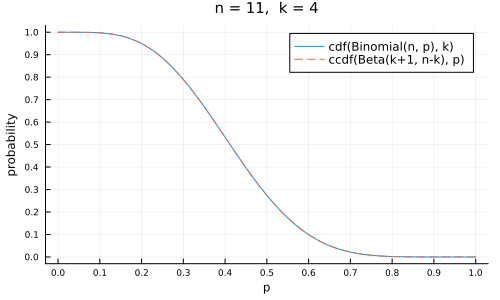

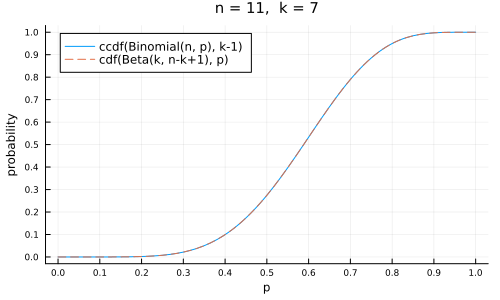

In [2]:
# 二項分布の累積分布函数がベータ分布の累積分布函数で表されることの数値的確認



n, k = 11, 4
plot(p -> cdf(Binomial(n, p), k), 0, 1; label="cdf(Binomial(n, p), k)")
plot!(p -> ccdf(Beta(k+1, n-k), p), 0, 1; label="ccdf(Beta(k+1, n-k), p)", ls=:dash)
plot!(xguide="p", yguide="probability")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
title!("n = $n,  k = $k") |> display

n, k = 11, 7
plot(p -> ccdf(Binomial(n, p), k-1), 0, 1; label="ccdf(Binomial(n, p), k-1)")
plot!(p -> cdf(Beta(k, n-k+1), p), 0, 1; label="cdf(Beta(k, n-k+1), p)", ls=:dash)
plot!(xguide="p", yguide="probability")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
title!("n = $n,  k = $k"; legend=:topleft) |> display

### IRRとVEに関するClopper-Pearsonの信頼区間

$\IRR$ と $\VE$ を $\pi$ で表す公式

$$
\IRR = \frac{\pi}{r(1-\pi)}, \quad
\VE = 1 - \frac{\pi}{r(1-\pi)}.
$$

を使えば, $\pi$ に関する信頼区間から $\IRR$ と $\VE$ に関する信頼区間が得られる.

$[L_\pi, U_\pi] = \confint_{\op{CP}}(c_1, c_0|\alpha)$ とおく:

$$
\begin{aligned}
&
L_\pi = \quantile(\op{Beta}(c_1, c_0+1), \alpha/2),
\\ &
U_\pi = \quantile(\op{Beta}(c_1+1, c_0), 1-\alpha/2).
\end{aligned}
$$

このとき $\IRR$ と $\VE$ に関するClopper-Pearsonの信頼区間は以下のように表される:

$\IRR$ に関するClopper-Pearsonの信頼区間:

$$
\left[
\frac{L_\pi}{r(1 - L_\pi)},
\frac{U_\pi}{r(1 - U_\pi)}
\right].
$$

$\VE$ に関するClopper-Pearsonの信頼区間:

$$
\left[
1 - \frac{U_\pi}{r(1 - U_\pi)},
1 - \frac{L_\pi}{r(1 - L_\pi)}
\right].
$$

### Bayes的な方法との比較

条件付き確率分布として出て来る二項分布における確率を正確に計算して構成されるClopper-Pearsonの信頼区間の変種として, Bayes統計における信用区間(credible interval)を使うこともできる.

二項分布の共役事前分布を $\op{Beta}(\gamma, \delta)$ について, データの数値 $(c_1, c_0)$ から得られる事後分布は $\op{Beta}(c_1+\gamma, c_0+\delta)$ になる. 

その事後分布における等裾信用区間(とうきょしんようくかん, equal-tailed credible interval)は次のように定義される:

$$
\credint_{\op{ETI}}(c_1, c_0|\alpha, \gamma, \delta) =
[\quantile(\op{Beta}(c_1+\gamma, c_0+\delta), \alpha/2), \quantile(\op{Beta}(c_1+\gamma, c_0+\delta), 1-\alpha/2)].
$$

これはClopper-Pearsonの信頼区間

$$
\confint_{\op{CP}}(c_1, c_0|\alpha) = 
[\quantile(\op{Beta}(c_1, c_0+1), \alpha/2), \quantile(\op{Beta}(c_1+1, c_0), 1-\alpha/2)].
$$

に似ているが, 上の信用区間は特別な場合としてClopper-Pearsonの信頼区間を含まない. 

なぜならば, Clopper-Pearsonの信頼区間の場合には左右の端点を計算するために異なるベータ分布達 $\op{Beta}(c_1, c_0+1)$, $\op{Beta}(c_1+1, c_0)$ を使っているが, 上の信用区間の方では同じベータ分布 $\op{Beta}(c_1+\gamma, c_0+\delta)$ を使っているからである.

$\gamma\ge 0$ のとき分布 $\op{Beta}(c_1+\gamma, c_0+1)$ は分布 $\op{Beta}(c_1, c_0+1)$ よりも右よりになるので, $\delta=1$ の場合の信用区間の左端の値 $\quantile(\op{Beta}(c_1+\gamma, c_0+1), \alpha/2)$ はClopper-Pearsonの信頼区間の左端の値 $\quantile(\op{Beta}(c_1, c_0+1), \alpha/2)$ よりも大きくなる.

同様に, $\delta\ge 0$ のとき分布 $\op{Beta}(c_1+1, c_0+\delta)$ は分布 $\op{Beta}(c_1+1, c_0)$ よりも左よりになるので, $\gamma=1$ の場合の信用区間の右端の値 $\quantile(\op{Beta}(c_1+1, c_0+\delta), 1-\alpha/2)$ はClopper-Pearsonの信頼区間の右端の値 $\quantile(\op{Beta}(c_1+1, c_0), 1-\alpha/2)$ よりも小さくなる.

ゆえに, 上の信用区間でClopper-Pearsonの信頼区間を近似するために $\gamma=\delta=1$ とすると, 信用区間はClopper-Pearsonの信頼区間よりも真に狭くなる.

しかし, 標本サイズを十分に大きくすると, それらはほぼ一致するようになる.

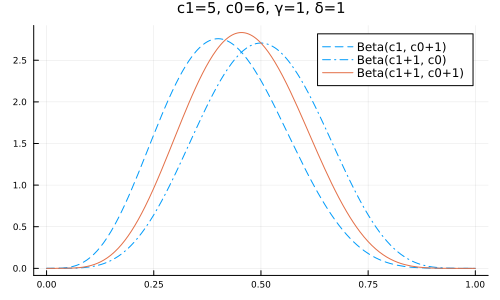

In [3]:
# Beta(c1, c0+1) と Beta(c1+1, c0) と Beta(c1+1, c0+1) の比較

c1, c0 = 5, 6
γ, δ = 1, 1
plot(Beta(c1, c0+1); label="Beta(c1, c0+1)", ls=:dash, c=1)
plot!(Beta(c1+1, c0); label="Beta(c1+1, c0)", ls=:dashdot, c=1)
plot!(Beta(c1+γ, c0+δ); label="Beta(c1+$γ, c0+$δ)", ls=:solid, c=2)
title!("c1=$c1, c0=$c0, γ=$γ, δ=$δ")

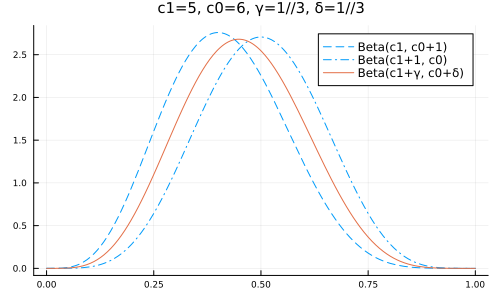

In [4]:
# Beta(c1, c0+1) と Beta(c1+1, c0) と Beta(c1+1/3, c0+1/3) の比較

c1, c0 = 5, 6
γ, δ = 1//3, 1//3
plot(Beta(c1, c0+1); label="Beta(c1, c0+1)", ls=:dash, c=1)
plot!(Beta(c1+1, c0); label="Beta(c1+1, c0)", ls=:dashdot, c=1)
plot!(Beta(c1+γ, c0+δ); label="Beta(c1+γ, c0+δ)", ls=:solid, c=2)
title!("c1=$c1, c0=$c0, γ=$γ, δ=$δ")

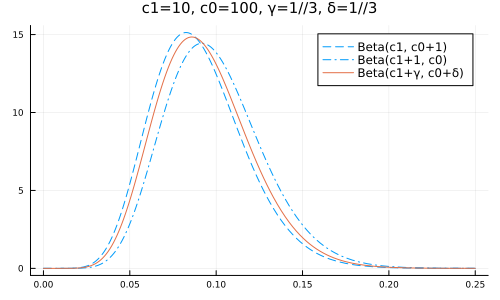

In [5]:
# Beta(c1, c0+1) と Beta(c1+1, c0) と Beta(c1+1/3, c0+1/3) の比較

c1, c0 = 10, 100
γ, δ = 1//3, 1//3
xlim = (0.0, 0.25)
plot(Beta(c1, c0+1), xlim...; label="Beta(c1, c0+1)", ls=:dash, c=1)
plot!(Beta(c1+1, c0), xlim...; label="Beta(c1+1, c0)", ls=:dashdot, c=1)
plot!(Beta(c1+γ, c0+δ), xlim...; label="Beta(c1+γ, c0+δ)", ls=:solid, c=2)
title!("c1=$c1, c0=$c0, γ=$γ, δ=$δ")

### Bayes的な点推定値

等裾信用区間に対応する点推定値は事後分布の中央値になる.  ベータ分布 $\op{Beta}(c_1+\gamma, c_0+\delta)$ の中央値は $(c_1+\gamma-1/3)/(c_1+c_0+\gamma+\delta-2/3)$ で近似されることがよく知られている.  ゆえにベータ分布 $\op{Beta}(c_1+1/3, c_0+1/3)$ の中央値は最尤推定値 $c_1/(c_1+c_0)$ で近似される.  このように, 共役事前分布として $\op{Beta}(1/3, 1/3)$ を採用すると, 等裾信用区間に対応する点推定値を最尤推定値に近付けることができる.

信用区間の取り方としては, 等裾信用区間とは別に, 最高密度信用区間(hihest density credible interval)もよく使われている.  最高密度信用区間は事後分布で測った確率が $1-\alpha$ に一致するような最短の区間として定義される.  最高密度信用区間の左右の端点における事後分布の密度函数の値は等しくなる. 

最高密度信用区間に対応する点推定値は事後分布の密度函数を最大化するパラメータ値(最頻値)になる.  ベータ分布 $\op{Beta}(c_1+\gamma, c_0+\delta)$ の最頻値は $(c_1+\gamma-1)/(c_1+c_0+\gamma+\delta-2)$ に等しい.  ゆえにベータ分布 $\op{Beta}(c_1+1, c_0+1)$ の最頻値は最尤推定値 $c_1/(c_1+c_0)$ で近似される.  このように, 共役事前分布として一様事前分布 $\op{Beta}(1, 1)$ を採用すると, 最高密度信用区間に対応する点推定値を最尤推定値に一致させることができる.

このような共役事前分布の微調節の影響は標本サイズが大きくなると小さくなり, 標本サイズを十分に大きくすると実践的には意味を失う.

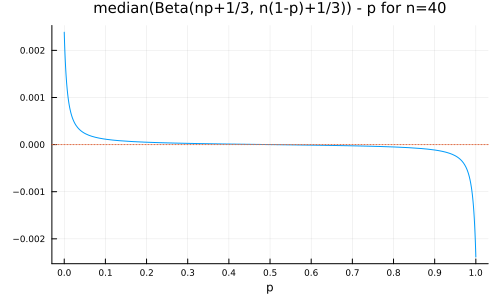

In [6]:
# Beta(a+1/3, b+1/3)の中央値が a/(a+b) で近似されることの数値的確認

n = 40
plot(p -> median(Beta(n*p+1/3, n*(1-p)+1/3)) - p; label="")
hline!([0]; label="", ls=:dot)
plot!(xtick=0:0.1:1, xguide="p")
title!("median(Beta(np+1/3, n(1-p)+1/3)) - p for n=$n")

### Pfizer社のプロトコルで採用されている事前分布

Pfizer社のプロトコルでは二項分布の事前分布として $\op{Beta}(0.700102, 1)$ を採用している.  こういう工夫は標本サイズが大きな場合には実践的には意味を失うことに注意せよ.

## 参照文献と参考動画

### 参照文献

* Qinyu Wei, Peng Wang and Ping Yin. Confidence interval estimation for vaccine efficacy against COVID-19. Front. Public Health, 12 August 2022, Sec. Infectious Diseases – Surveillance, Prevention and Treatment. https://doi.org/10.3389/fpubh.2022.848120
* C4591001 Clinical Trial Group. Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine. December 31, 2020
N Engl J Med 2020; 383:2603-2615. https://doi.org/10.1056/NEJMoa2034577

### 参考動画

リスクや治療効果の指標については次の講義動画で学べる:

* 田中司朗（医学研究科 臨床統計学/臨床統計家育成コース 特定教授). リスクの指標と治療効果の指標. 京都大学大学院医学研究科 聴講コース 臨床研究者のための生物統計学, 2017年7月20日. https://youtu.be/OO9X1SXy_vE

## 計算例

### Clopper-Pearsonの信頼区間の計算例

In [7]:
function efficacyhat(c1, T1, c0, T0)
    1 - (c1/T1)/(c0/T0)
end

function confint_efficacy_clopper_pearson(c1, T1, c0, T0; α=0.05)
    Lπ = c1 == 0 ? 0.0 : quantile(Beta(c1, c0+1), α/2)
    Uπ = c0 == 0 ? 1.0 : quantile(Beta(c1+1, c0), 1-α/2)
    r = T1/T0
    [1 - Uπ/(r*(1-Uπ)), 1 - Lπ/(r*(1-Lπ))]
end

# Table 3 of https://doi.org/10.1056/NEJMoa2034577
data = Any[
    8 2.214 17411 162 2.222 17511  95.0  90.0  97.9
    5 1.234  9897 114 1.239  9955  95.6  89.4  98.6
    3 0.980  7500  48 0.983  7543  93.7  80.6  98.8
    1 0.508  3848  19 0.511  3880  94.7  66.7  99.9
    0 0.102   774   5 0.106   785 100.0 −13.1 100.0
    3 1.124  8875  81 1.108  8762  96.4  88.9  99.3
    5 1.090  8536  81 1.114  8749  93.7  84.7  98.0
    7 1.889 14504 146 1.903 14670  95.2  89.8  98.1
    0 0.165  1502   7 0.164  1486 100.0  31.2 100.0
    1 0.160  1405   9 0.155  1355  89.3  22.6  99.8
    3 0.605  4764  53 0.600  4746  94.4  82.7  98.9
    5 1.596 12548 109 1.608 12661  95.4  88.9  98.5
    1 0.351  2545  35 0.346  2521  97.2  83.3  99.9
    1 0.119  1129   8 0.117  1121  87.7   8.1  99.7
    6 1.732 13359 119 1.747 13506  94.9  88.6  98.2
]

for i in axes(data, 1)
    c1, T1, n1, c0, T0, n0, vehat, ci_L, ci_U = data[i, :]
    VEhat = efficacyhat(c1, T1, c0, T0)
    CI_L, CI_U = confint_efficacy_clopper_pearson(c1, T1, c0, T0)
    @printf("%2d  %5.3f (%5d)  %4d  %5.3f (%5d)  \
        %5.1f (%5.1f -- %5.1f)  %5.1f (%5.1f -- %5.1f)  %5.1f (%5.1f -- %5.1f)\n",
        c1, T1, n1, c0, T0, n0, vehat, ci_L, ci_U, 100VEhat, 100CI_L, 100CI_U,
        100VEhat-vehat, 100CI_L-ci_L, 100CI_U-ci_U)
end

 8  2.214 (17411)   162  2.222 (17511)   95.0 ( 90.0 --  97.9)   95.0 ( 90.0 --  97.9)    0.0 ( -0.0 --  -0.0)
 5  1.234 ( 9897)   114  1.239 ( 9955)   95.6 ( 89.4 --  98.6)   95.6 ( 89.4 --  98.6)   -0.0 (  0.0 --  -0.0)
 3  0.980 ( 7500)    48  0.983 ( 7543)   93.7 ( 80.6 --  98.8)   93.7 ( 80.5 --  98.8)    0.0 ( -0.1 --  -0.0)
 1  0.508 ( 3848)    19  0.511 ( 3880)   94.7 ( 66.7 --  99.9)   94.7 ( 66.7 --  99.9)    0.0 ( -0.0 --  -0.0)
 0  0.102 (  774)     5  0.106 (  785)  100.0 (-13.1 -- 100.0)  100.0 (-13.4 -- 100.0)    0.0 ( -0.3 --   0.0)
 3  1.124 ( 8875)    81  1.108 ( 8762)   96.4 ( 88.9 --  99.3)   96.3 ( 88.9 --  99.3)   -0.1 (  0.0 --  -0.0)
 5  1.090 ( 8536)    81  1.114 ( 8749)   93.7 ( 84.7 --  98.0)   93.7 ( 84.7 --  98.0)   -0.0 ( -0.0 --   0.0)
 7  1.889 (14504)   146  1.903 (14670)   95.2 ( 89.8 --  98.1)   95.2 ( 89.8 --  98.1)   -0.0 ( -0.0 --  -0.0)
 0  0.165 ( 1502)     7  0.164 ( 1486)  100.0 ( 31.2 -- 100.0)  100.0 ( 31.0 -- 100.0)    0.0 ( -0.2 --   0.0)
 

微小に数値が一致しないのはなぜか?

Table 3 of https://www.nejm.org/doi/10.1056/NEJMoa2034577

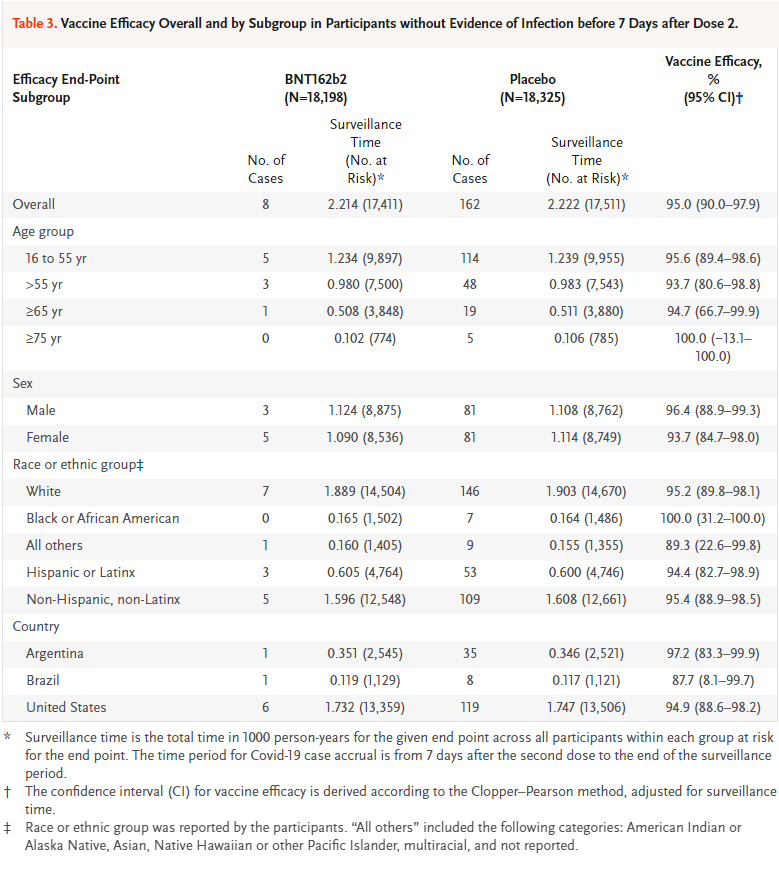

### P値函数と信頼区間の関係

P値函数が与えられたとき, 95%信頼区間は概念的には以下の手続きで計算されると考えられる.

$\VE$ のClopper-Pearsonの信頼区間に対応するP値函数は次のようにシンプルに実装される.

In [8]:
function pvalue_efficacy_clopper_pearson(c1, T1, c0, T0; VE=1)
    r = T1/T0
    IRR = 1 - VE
    p = r*IRR/(r*IRR + 1)
    0 ≤ p ≤ 1 || return 0.0
    bin = Binomial(c1+c0, p)
    min(1, 2cdf(bin, c1), 2ccdf(bin, c1-1))
end

pvalue_efficacy_clopper_pearson (generic function with 1 method)

例として, $(c_1, T_1, c_0, T_0) = (8, 2.214, 162, 2.222)$ の場合を扱おう.

In [9]:
c1, T1, c0, T0 = 8, 2.214, 162, 2.222;

(1) $\VE$ を連続的に動かしてP値を計算する.

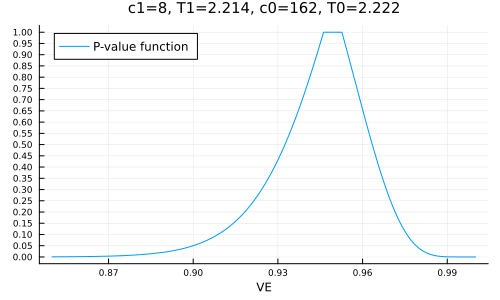

In [10]:
P = plot(legend=:topleft)
plot!(VE -> pvalue_efficacy_clopper_pearson(c1, T1, c0, T0; VE), 0.85, 1.0;
    label="P-value function")
plot!(xguide="VE", ytick=0:0.05:1)
title!("c1=$c1, T1=$T1, c0=$c0, T0=$T0")

(2) P値が5%以上になるVEの値全体の集合として95%信頼区間が求まる.

CI = confint_efficacy_clopper_pearson(c1, T1, c0, T0; α = 0.05) = [0.8999936443870009, 0.978961093148583]


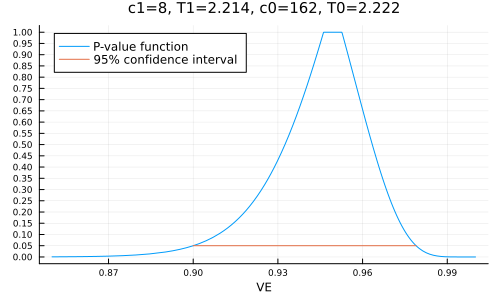

In [11]:
@show CI = confint_efficacy_clopper_pearson(c1, T1, c0, T0; α=0.05)
plot!(CI, fill(0.05, 2); label="95% confidence interval")

すなわち, $\VE$ に関する95%信頼区間は仮説 $\VE = a$ が有意水準5%で棄却されない値 $a$ 全体の集合として求まる.

通常の仮説検定の手続きでは, 特別な帰無仮説(多くの場合に効果がないことを意味する仮説)のP値だけを計算して, その特別な帰無仮説だけを検定する.

信頼区間を計算することは「効果は $a$ である」($a$ は具体的な数値)の形の無数の仮説達の検定を一斉に行うことと同等である.  棄却されなかった仮説の値 $a$ 全体の集合が信頼区間になる.

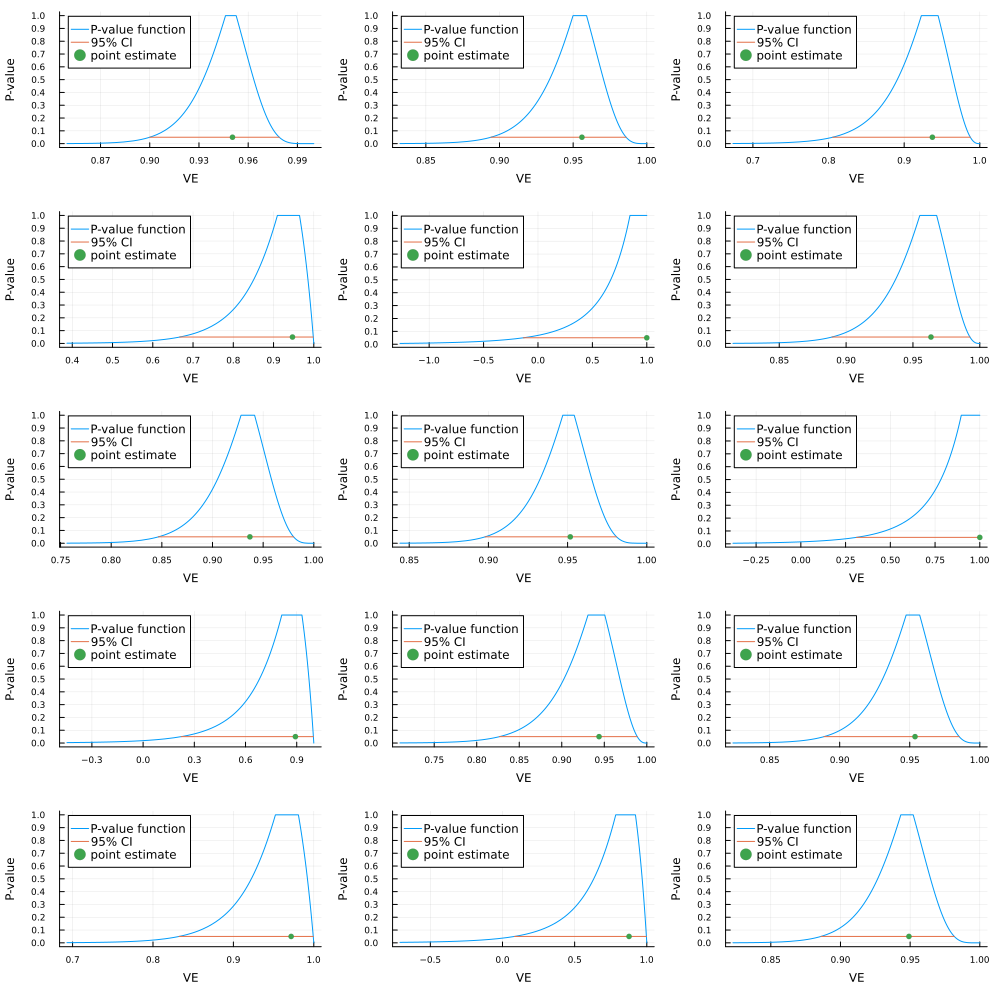

In [12]:
# P値函数と信頼区間の関係:
# 95%信頼区間はP値函数のグラフを高さ5%で切断して得られる線分になる.

PP = []
for i in axes(data, 1)
    c1, T1, n1, c0, T0, n0, ve, ci_L, ci_U = data[i, :]
    VEhat = efficacyhat(c1, T1, c0, T0)
    CI_L, CI_U = confint_efficacy_clopper_pearson(c1, T1, c0, T0)

    xlim = (VEhat - 2(VEhat - CI_L), min(1, VEhat + 2(CI_U - VEhat)))
    P = plot(VE -> pvalue_efficacy_clopper_pearson(c1, T1, c0, T0; VE), xlim...;
        label="P-value function")
    plot!([CI_L, CI_U], fill(0.05, 2); label="95% CI")
    scatter!([VEhat], [0.05]; label="point estimate", ms=3, msw=0)
    plot!(xguide="VE", yguide="P-value")
    plot!(ytick=0:0.1:1)
    plot!(legend=:topleft)
    push!(PP, P)
end

plot(PP...; size=(1000, 1000), layout=(5, 3))
plot!(leftmargin=2Plots.mm)